In [1]:
# Enable plotting
%matplotlib inline

# Supress Warning 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# PyCCD  


> ### Import the Datacube Configuration

> ### This notebook was derived from the CEOS-SEO collection - thanks CEOS and AMA

- tony

In [3]:
import datacube
dc = datacube.Datacube(app = 'my_app', config = './datacube.conf')

>### Browse the available Data Cubes on the storage platform    
> You might want to learn more about what data is stored and how it is stored.


In [6]:
list_of_products = dc.list_products()
geoTiff_products = list_of_products[list_of_products['format'] == 'GeoTiff']
geoTiff_products

name                          description   lat   platform  \
id                                                                          
51  landsat_5_USARD  Landsat 5 US/ARD Product Definition  None  LANDSAT_5   
52  landsat_7_USARD  Landsat 7 US/ARD Product Definition  None  LANDSAT_7   
53  landsat_8_USARD  Landsat 8 US/ARD Product Definition  None  LANDSAT_8   

     lon product_type instrument  time   format  crs  resolution  tile_size  \
id                                                                            
51  None        USARD         TM  None  GeoTiff  NaN         NaN        NaN   
52  None        USARD        ETM  None  GeoTiff  NaN         NaN        NaN   
53  None        USARD   OLI_TIRS  None  GeoTiff  NaN         NaN        NaN   

    spatial_dimensions  
id                      
51                 NaN  
52                 NaN  
53                 NaN

In [10]:

import datacube
import time

from datetime import datetime

dc = datacube.Datacube()

selected_product = 'landsat_7_USARD'

date_range = (
        datetime(2015,1,1),
        datetime(2015,12,31))
dss = dc.find_datasets(product=selected_product, time=date_range, measurements=['red',])

clear_datasets = []
for item in dss:
    
    if float(item.metadata_doc['cloud_cover']) < 30.0:
        if float(item.metadata_doc['fill']) < 30.0:
            clear_datasets.append(item)
            
print("Number of Pretty Scenes", len(clear_datasets))
for citem in clear_datasets:
    print(citem.uris)


Number of Pretty Scenes 7
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20151005/LE07_CU_003003_20151005_20170713_C01_V01.xml']
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150919/LE07_CU_003003_20150919_20170713_C01_V01.xml']
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150818/LE07_CU_003003_20150818_20170713_C01_V01.xml']
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150717/LE07_CU_003003_20150717_20170713_C01_V01.xml']
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150701/LE07_CU_003003_20150701_20170713_C01_V01.xml']
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150615/LE07_CU_003003_20150615_20170713_C01_V01.xml']
['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01.xml']


In [12]:
print(citem.uris)


dir(citem)

['s3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01.xml']


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'archived_time',
 'bounds',
 'center_time',
 'crs',
 'extent',
 'format',
 'id',
 'indexed_by',
 'indexed_time',
 'is_active',
 'is_archived',
 'local_path',
 'local_uri',
 'managed',
 'measurements',
 'metadata',
 'metadata_doc',
 'metadata_type',
 'sources',
 'time',
 'transform',
 'type',
 'uri_scheme',
 'uris']

In [13]:
citem.measurements

{'blue': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_SRB1.tif'},
 'green': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_SRB2.tif'},
 'nir': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_SRB4.tif'},
 'pixel_qa': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_PIXELQA.tif'},
 'red': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_SRB3.tif'},
 'swir1': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_SRB5.tif'},
 'swir2': {'layer': 1,
  'path': 's3://ga-odc-eros-l1til-west/til/003003/LE07/20150223/LE07_CU_003003_20150223_20170713_C01_V01_SRB7.tif'}}

In [14]:
citem.extent

[(-2115585.0, 2714805.0), (-2115585.0, 2864805.0), (-1965585.0, 2864805.0), (-1965585.0, 2714805.0), (-2115585.0, 2714805.0)]


Geometry(POLYGON ((-2115585 2714805,-2115585 2864805,-1965585 2864805,-1965585 2714805,-2115585 2714805)), epsg:5072)

citem.time

In [15]:
citem.time

Range(begin=datetime.datetime(2015, 2, 23, 18, 54, 51, 875520, tzinfo=tzlocal()), end=datetime.datetime(2015, 2, 23, 18, 54, 51, 875520, tzinfo=tzlocal()))

In [16]:
citem.bounds

BoundingBox(left=-2115585.0, bottom=2714805.0, right=-1965585.0, top=2864805.0)

In [56]:
# import json
json_in = citem.metadata_doc

type (json_in)

json_in['cloud_cover']
json_in
#json_in['creation_dt']



longitude_extents = ((float)(json_in['extent']['coord']['ll']['lon']), (float)(json_in['extent']['coord']['ur']['lon']))

print(longitude_extents)

latitude_extents = ((float)(json_in['extent']['coord']['ll']['lat']), (float)(json_in['extent']['coord']['ur']['lat']))

print(latitude_extents)

# meta = json.loads(json_in)

# meta


(-123.652959903, -121.279418402)
(44.6880805402, 46.35679328)


>### Pick a product  
>Use the platform names from the previous block to select a small Data Cube. The data_access_api utility will give you lat, lon, and time bounds of your Data Cube.   

In [57]:
# import utils.data_cube_utilities.data_access_api as dc_api  
# api = dc_api.DataAccessApi(config = './datacube.conf')

platform = "LANDSAT_7"

product = "landsat_7_USARD"

# Get Coordinates
# coordinates = api.get_full_dataset_extent(platform = platform, product = product)

In [58]:
# help

> #### Display Lat-Lon and Time Bounds

# Visualize Data Cube Region
## USARD h03v03 TILE!

In [68]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

> #### Picking a smaller analysis region
# hayden Island Only - approximately 300x300 pixels

In [60]:


#### Hayden Island
latitude_extents =  (45.59,45.65)
longitude_extents = (-122.65,-122.75)


time_extents = ('2000-01-01', '2016-01-01')

In [63]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Loading the Data
> The following snippet loads in Landsat Imagery for the extents we've just defined. Furthermore we specify a preference to load data from `red`, `green`, `blue`, `nir`, `swir1`, `swir2`, and `pixel_qa` bands.  

In [67]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          datasets=clear_datasets,
                          platform = platform,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa'],
                          output_crs = 'epsg:5072', 
                          resolution = (-30,30)) 

TONY load function
[(-122.65, 45.59), (-122.75, 45.59), (-122.75, 45.65), (-122.65, 45.65), (-122.65, 45.59)]
[(-2060460.0, 2809680.0), (-2060460.0, 2801070.0), (-2051100.0, 2801070.0), (-2051100.0, 2809680.0), (-2060460.0, 2809680.0)]


KeyError: 'pixel_qa'

> ### Examining the size of our extent.  
> The compute time of pyCCD scales sharply with extent sizes. Seemingly small areas can take anywhere from 10-15 minutes to process.

In [12]:
landsat_dataset
#view the dimensions and sample content from the cube

<xarray.Dataset>
Dimensions:    (latitude: 18, longitude: 55, time: 152)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-20T15:06:11 2000-04-08T15:05:56 ...
  * latitude   (latitude) float64 1.33 1.33 1.33 1.329 1.329 1.329 1.328 ...
  * longitude  (longitude) float64 -74.86 -74.86 -74.86 -74.86 -74.86 -74.86 ...
Data variables:
    red        (time, latitude, longitude) int16 1105 913 701 739 798 720 ...
    green      (time, latitude, longitude) int16 1171 1019 890 847 869 869 ...
    blue       (time, latitude, longitude) int16 915 815 674 654 654 655 655 ...
    nir        (time, latitude, longitude) int16 3372 3372 3493 3211 3090 ...
    swir1      (time, latitude, longitude) int16 2677 2415 2368 2392 2392 ...
    swir2      (time, latitude, longitude) int16 1428 1154 1053 1179 1103 ...
    pixel_qa   (time, latitude, longitude) int32 96 96 66 66 66 66 66 66 66 ...
Attributes:
    crs:      EPSG:4326

# PyCCD

>### Import Library  
The library exposes three functions: `process_xarray`, `process_pixel`, `plot_pixel`  

In [13]:
import utils.data_cube_utilities.dc_ccd as ccd

import imp
imp.reload(ccd)


<module 'utils.data_cube_utilities.dc_ccd' from '/home/local/AMA-INC/jcrattz/data_cube_notebooks/utils/data_cube_utilities/dc_ccd.py'>

> ### Timed Calculation of change volume  


In [14]:
%time ccd_product = ccd.process_xarray(landsat_dataset, distributed = True) #Run process xarray on large dataset

CPU times: user 4.42 s, sys: 116 ms, total: 4.54 s
Wall time: 1min 16s


> ## Plotting change volume  
> Plot change volume to identify regions/areas of change

In [15]:
def figure_ratio(ds, fixed_width = 22):
    width = fixed_width
    height = len(ds.latitude) * (fixed_width / len(ds.longitude))
    return (width, height)

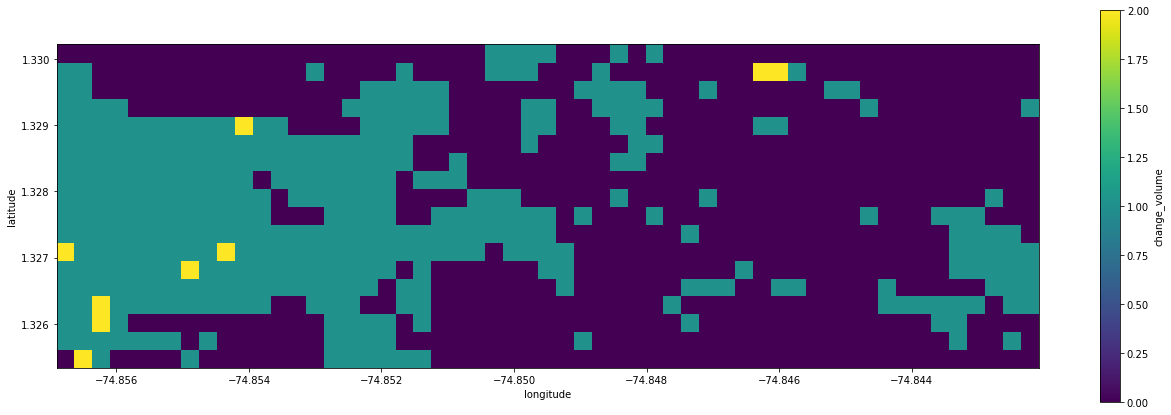

In [16]:
import  matplotlib.pyplot as plt  

plt.figure(figsize = figure_ratio(ccd_product))
ccd_product.plot()
plt.axes().set_aspect("equal")

## Time of first changes

In [17]:
%time time_map_ccd_product = ccd.process_xarray(landsat_dataset, distributed = True, process = "first") #Run process xarray on large dataset

CPU times: user 7.15 s, sys: 148 ms, total: 7.3 s
Wall time: 1min 18s


### Plot Detection Dates

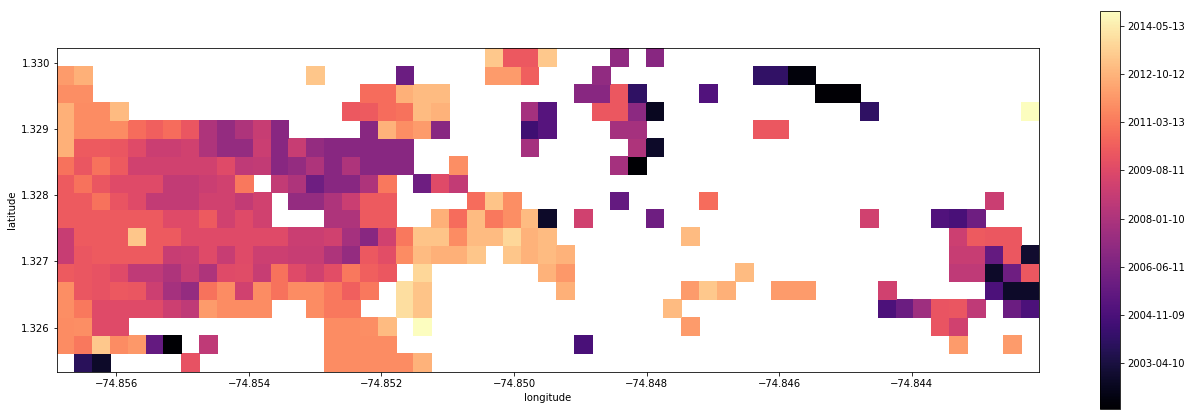

In [18]:
import datetime
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

plt.figure(figsize = figure_ratio(time_map_ccd_product))
epochFormatter = FuncFormatter(lambda x, pos: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
time_map_ccd_product.plot(cmap = "magma", cbar_kwargs=({'format': epochFormatter}))
plt.axes().set_aspect("equal")


<br>  

# Validating Change

> ### Imagery from earlier acquisitions  
> Change starts with landcover before...    

'Basemap' was not found in 'mpl_toolkits.basemap'.  It is likely that 'mpl_toolkits.basemap' is not present
2000-04-08T15:05:56.000000000


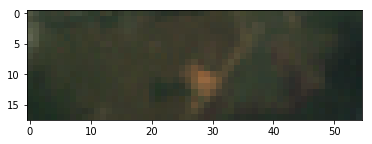

In [19]:
from dc_notebook_utilities import rgb
print( landsat_dataset.time.values[1] )
rgb(landsat_dataset, at_index = 0)

> ### Imagery from later acquisitions  
> ... and is revealed when compared to landcover after.  

2012-12-21T15:09:40.000000000


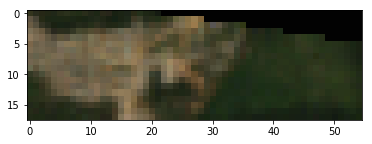

In [20]:
print( landsat_dataset.time.values[130] )
rgb(landsat_dataset, at_index = 130)


<br>
<br>
<br>

># Change within a selected Pixel

<br>
> ### Define Pixel Lat and Lon

In [21]:
## Bangladesh 
pixel_latitude = 25.228928
pixel_longitude  = 90.035790

## Colombia  
pixel_latitude = 1.3282
pixel_longitude  = -74.8549  

> ### Select a Pixel from dataset

In [22]:
target_pixel = landsat_dataset.sel(latitude = pixel_latitude, longitude = pixel_longitude, method = "nearest")

In [23]:
processed_pixel = ccd.process_pixel(target_pixel)

<br>

> ### Plot time series models  

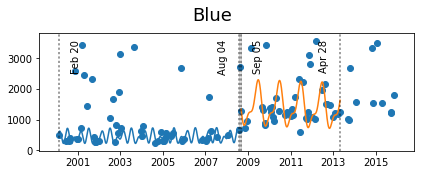

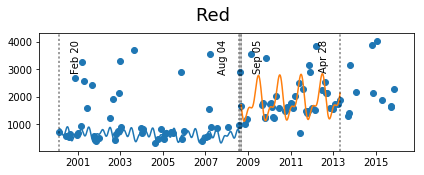

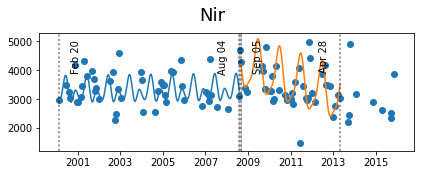

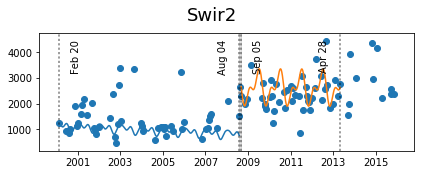

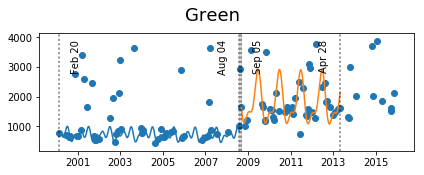

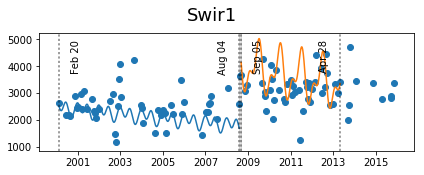

In [24]:
ccd.plot_pixel(processed_pixel)

> ### Plotting Residuals 

In [25]:
from functools import partial
from datetime import datetime, timedelta
from scipy.spatial.distance import euclidean  

def _clean_pixel(_ds, saturation_threshold=10000):
    """Filters out over-saturated values

    Creates a mask from the saturation threshold and > 0 and applies it to _ds.

    Args:
        _ds: dataset to mask
        saturation_threshold: threshold that a pixel must be below to be considered 'clean'

    Returns:
        an xArray dataset that has been masked for saturation and valid (>0) pixels
    """
    ds = _ds
    mask = (ds < saturation_threshold) & (ds >= 0)
    indices = [x for x, y in enumerate(mask.red.values) if y == True]
    return ds.isel(time=indices)


def _n64_to_datetime(n64):
    """Convert Numpy 64 bit timestamps to datetime objects. Units in seconds"""
    return datetime.utcfromtimestamp(n64.tolist() / 1e9)

def n64_to_ordinal(n64):
    dt = _n64_to_datetime(n64)
    return dt.toordinal()

def _plot_res(results=None, original_pixel=None, band=None, file_name=None):
    """Plots CCD residual for a given band. Accepts a 1x1xt xarray if a scatter-plot overlay of original acquisitions over the ccd results is needed."""

    fig = plt.figure(1, figsize =(20,5))
    fig.suptitle(band.title() + " Residual ", fontsize=18, verticalalignment='bottom')

    lastdt = None

    dateLabels = []

    for change_model in results["change_models"]:
        ax1 = fig.add_subplot(111)
        model = getattr(change_model, band)        
        time = original_pixel.sel(time = slice(datetime.fromordinal(change_model.start_day),
                                                datetime.fromordinal(change_model.end_day))
                                  ).time.values        
        ordinal_time = list(map(n64_to_ordinal , time))
        actual    = original_pixel[band].values
        
        predicted = list(map(partial(ccd._lasso_eval,bias= model.intercept, weights = model.coefficients), ordinal_time))
        residual  = list(map(lambda x: euclidean(x[0], x[1]), zip(actual, predicted)))
                
        x = time
        y = residual

        ax1.plot(x, y, label= model.coefficients)
        
        # Curve Fit Code  
        polycoeffs = np.polyfit(ordinal_time,residual,5)

        f = np.poly1d(polycoeffs)

        x_new = np.linspace(ordinal_time[0], ordinal_time[-1], 50)
        y_new = f(x_new)
        ax1.plot(x_new, y_new, c = "#333333")
        
        # Draw Vertical Lines
        dt = datetime.fromordinal(change_model.start_day)
        dateLabels.append(dt)

        if lastdt is not None:
            ax1.axvspan(lastdt, dt, color=(0, 0, 0, 0.1))

        dt = datetime.fromordinal(change_model.end_day)
        dateLabels.append(dt)

        lastdt = dt


    ymin, ymax = ax1.get_ylim()
    for idx, dt in enumerate(dateLabels):
        plt.axvline(x=dt, linestyle='dotted', color=(0, 0, 0, 0.5))
        # Top, inside
        plt.text(
            dt,
            ymax,
            "\n" +  # HACK TO FIX SPACING
            dt.strftime('%b %d') + "  \n"  # HACK TO FIX SPACING
            ,
            rotation=90,
            horizontalalignment='right' if (idx % 2) else 'left',
            verticalalignment='top')

    plt.tight_layout()

    if file_name is not None:
        _save_plot_to_file(plot=plt, file=filename, band_name=band)
    plt.show()


<br>  
> ### Remove points that don't have a `clear` designation on `pixel_qa`

In [26]:
clear_pixel = processed_pixel.where(processed_pixel.pixel_qa == 66, drop = True)

> ### Run Residual Plotting on a pixel with clear values  

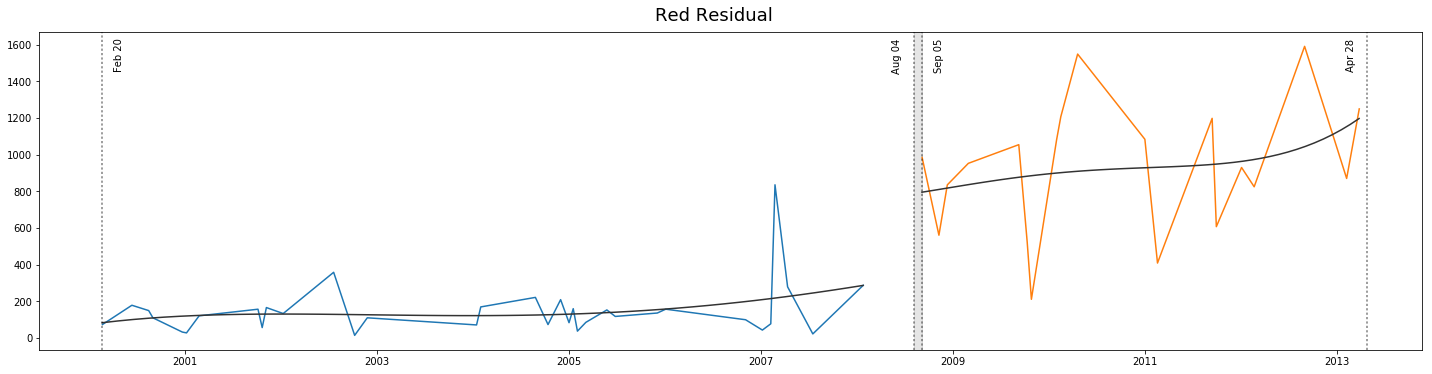

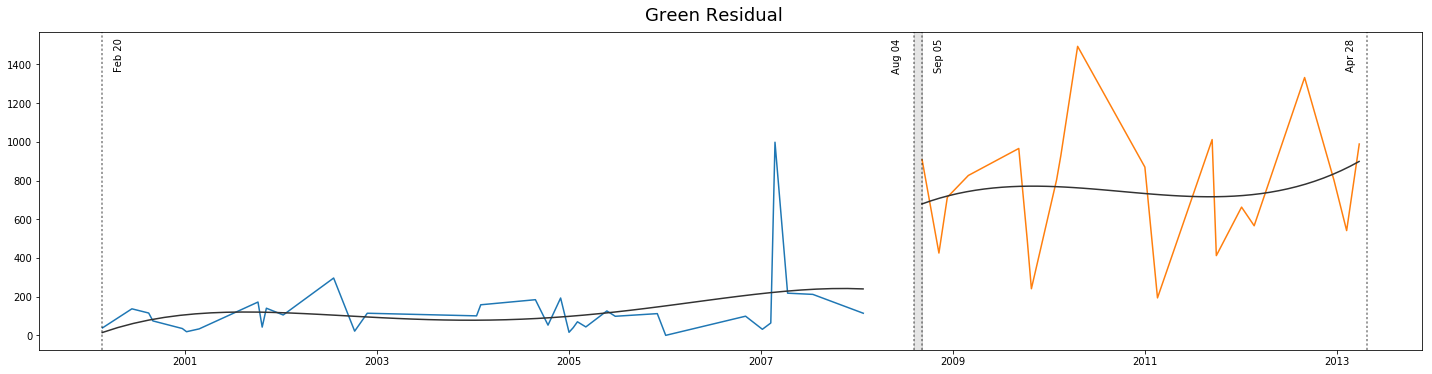

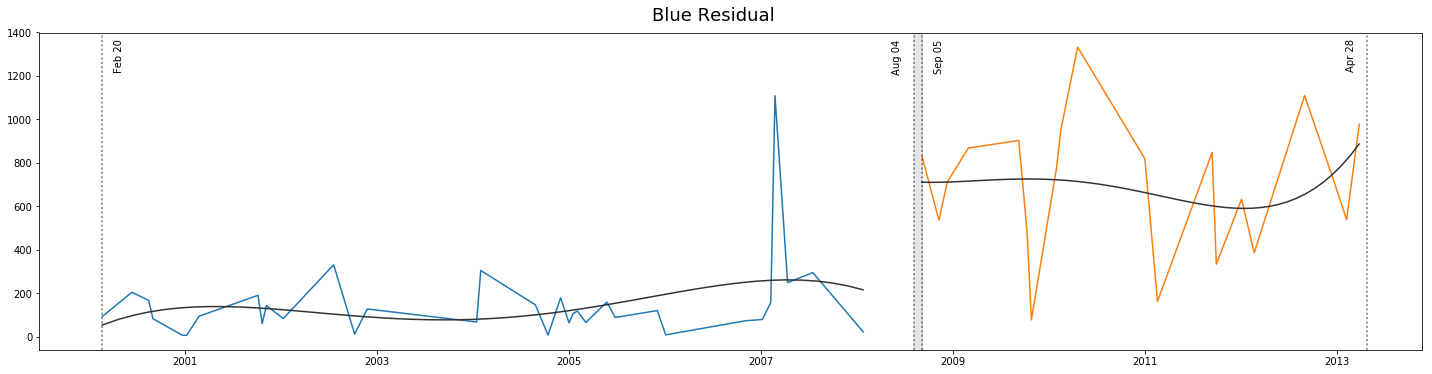

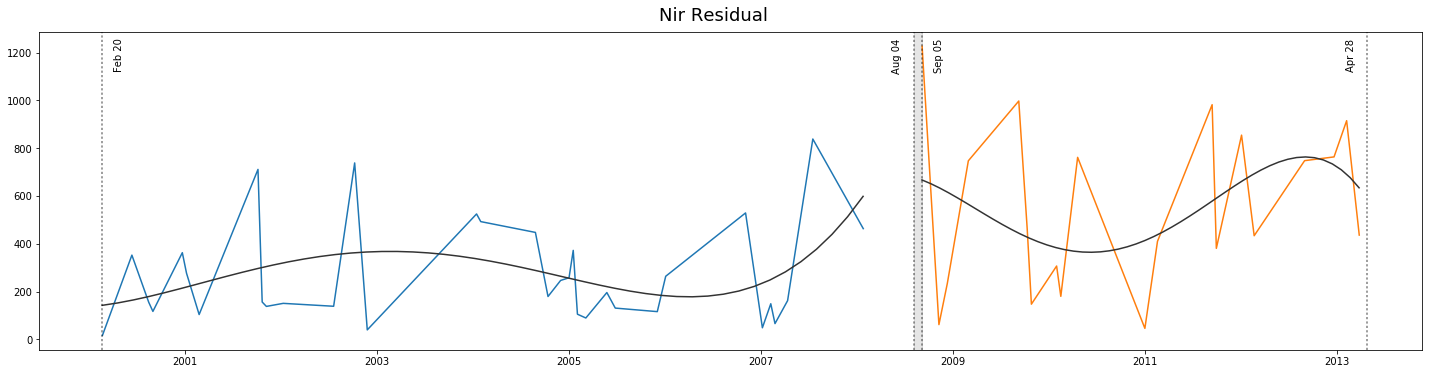

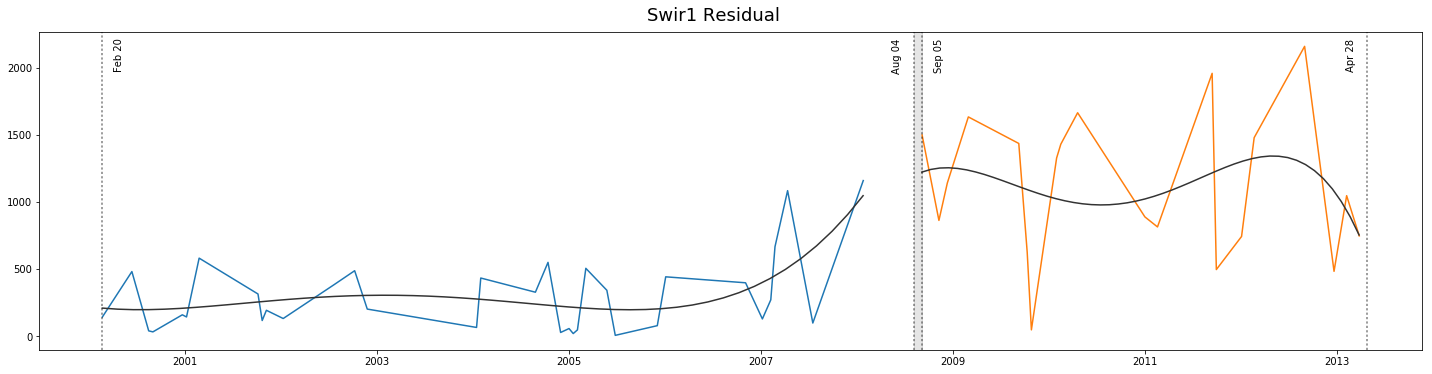

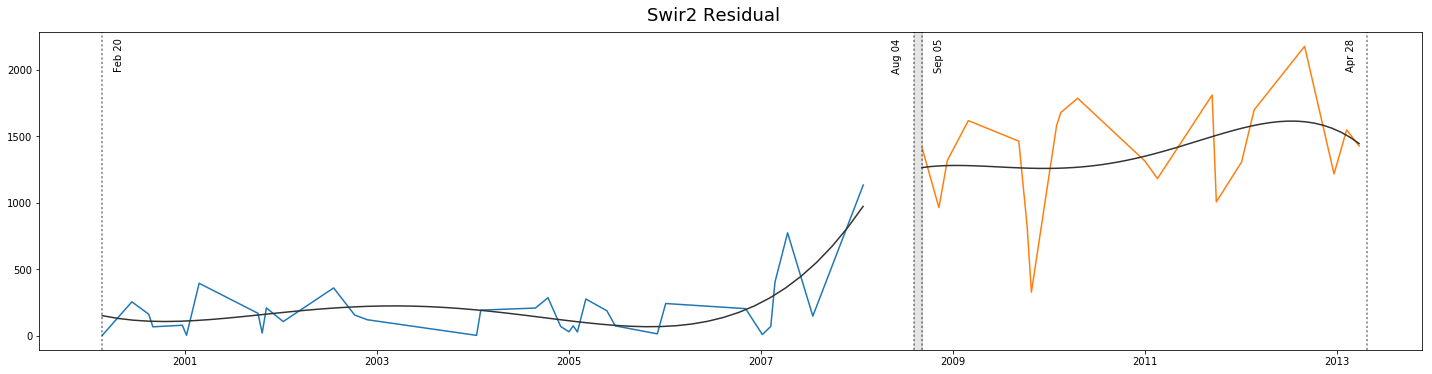

In [27]:
for band in ['red', 'green', 'blue', 'nir', 'swir1', 'swir2']:
    _plot_res(results= clear_pixel.attrs['ccd_results'],
              original_pixel=clear_pixel,
              band=band,
              file_name=None)